In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Sacramento.csv")

X = df[['sqft']]
y = df['price']

## Visualización de datos

<ipython-input-2-107a63c6f30c>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


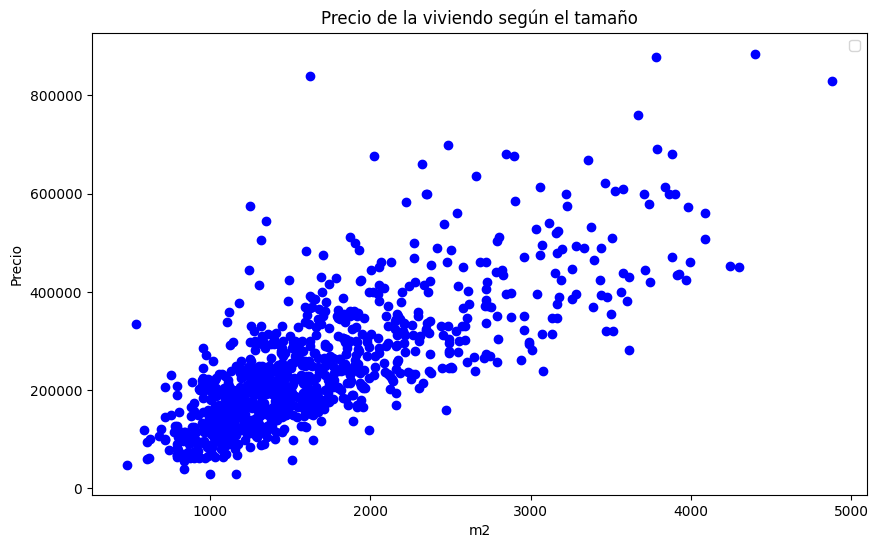

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.title('Precio de la viviendo según el tamaño')
plt.xlabel('m2')
plt.ylabel('Precio')
plt.legend()
plt.show()

## Split Train-Test

In [ ]:
# Split the dataset into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train[['sqft']]
y_train = df_train['price']
X_test = df_test[['sqft']]
y_test = df_test['price']

## Creación de modelo líneal simple y evaluación



Ayuda: [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error Test: {mse}")

y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error Train: {mse}")

Mean Squared Error Test: 8153409280.203809
Mean Squared Error Train: 6790590462.357506


## Creación de modelo polinómico simple y evaluación

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 5 # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train)
X_train_poly

array([[1.00000000e+00, 1.18500000e+03, 1.40422500e+06, 1.66400662e+09,
        1.97184785e+12, 2.33663970e+15],
       [1.00000000e+00, 1.71800000e+03, 2.95152400e+06, 5.07071823e+09,
        8.71149392e+12, 1.49663466e+16],
       [1.00000000e+00, 2.44200000e+03, 5.96336400e+06, 1.45625349e+10,
        3.55617102e+13, 8.68416963e+16],
       ...,
       [1.00000000e+00, 1.37300000e+03, 1.88512900e+06, 2.58828212e+09,
        3.55371135e+12, 4.87924568e+15],
       [1.00000000e+00, 1.73900000e+03, 3.02412100e+06, 5.25894642e+09,
        9.14530782e+12, 1.59036903e+16],
       [1.00000000e+00, 1.38000000e+03, 1.90440000e+06, 2.62807200e+09,
        3.62673936e+12, 5.00490032e+15]])

In [ ]:
X_train

,sqft
54,1185
299,1718
501,2442
811,3885
394,1351
...,...
106,1284
270,2494
860,1373
435,1739


Ayuda: [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 5 # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

poly_features.fit(X_train)
X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error Test: {mse}")

y_pred_train = model.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error Train: {mse}")

Mean Squared Error Test: 8071134144.240216
Mean Squared Error Train: 6709083221.668106


## Ejemplos

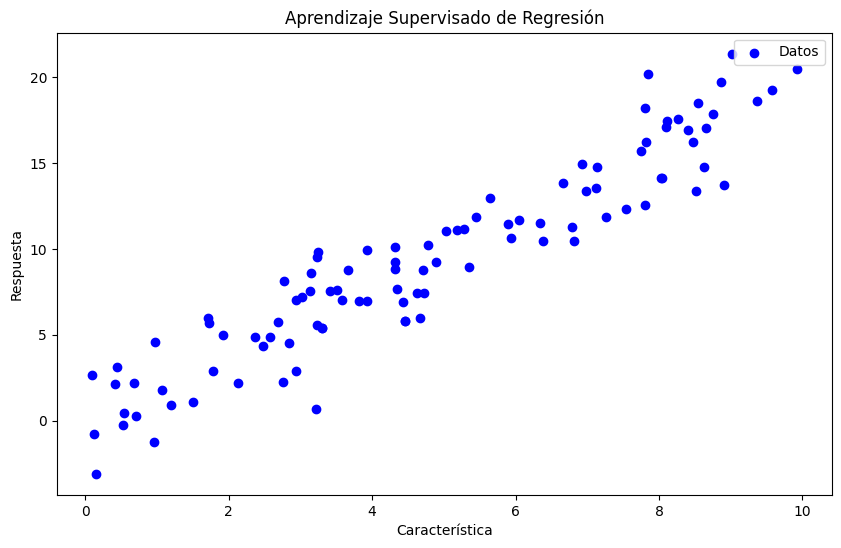

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generamos datos sintéticos para una regresión lineal simple
X_reg = np.random.rand(100, 1) * 10  # Característica aleatoria
y_reg = 2 * X_reg + np.random.randn(100, 1) * 2  # Respuesta con ruido

# Dividimos los datos en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Visualización de la regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Datos')
plt.title('Aprendizaje Supervisado de Regresión')
plt.xlabel('Característica')
plt.ylabel('Respuesta')
plt.legend()
plt.show()

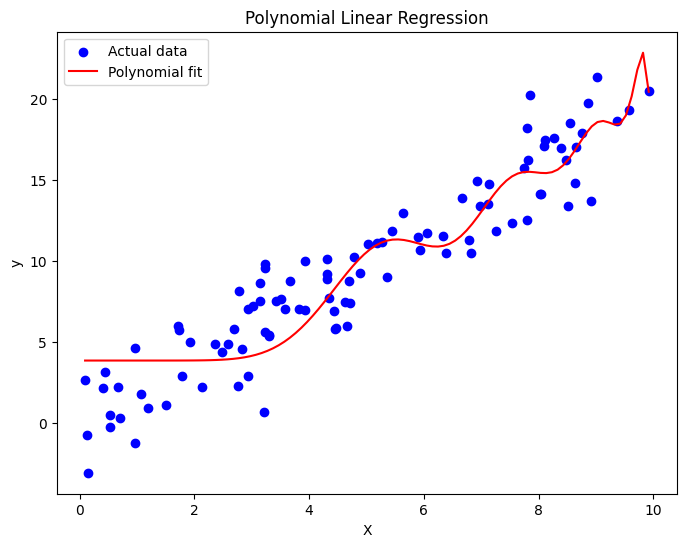

In [ ]:
degree = 20
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_reg)
X_test_poly = poly_features.transform(X_test_reg)

X_range = np.linspace(X_reg.min(), X_reg.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)

model_reg = LinearRegression()
model_reg.fit(X_train_poly, y_train_reg)

y_pred_reg = model_reg.predict(X_test_poly)

y_range = model_reg.predict(X_range_poly)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Actual data')
plt.plot(X_range, y_range, color='red', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Linear Regression')
plt.legend()
plt.show()